In [6]:
from keras.datasets import imdb
from keras.layers import Embedding, SimpleRNN, Dense
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

'''
サンプルデータの生成
'''
max_features = 10000        # 特徴量として考慮する単語の数
max_len = 500               # この数の単語だけを残してテキストをカット
batch_size = 32

print("Loading data ...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), "train sequence")
print(len(input_test), " test sequence")

print("Pad sequence (samples x times)")
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print("input_train shape : ", input_train.shape)
print("input_test shaape : ", input_test.shape)


Loading data ...
25000 train sequence
25000  test sequence
Pad sequence (samples x times)
input_train shape :  (25000, 500)
input_test shaape :  (25000, 500)


In [0]:
'''
モデルの構築
'''
early_stopping = EarlyStopping(monitor= "val_loss", patience= 10, verbose= 1)
variance_vector_dim = 32        # 分散ベクトルの次元

model = Sequential()
model.add(Embedding(max_features, variance_vector_dim))
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["acc"]
)

In [10]:
'''
学習
'''
history = model.fit(
    input_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.6681 - acc: 0.5815 - val_loss: 0.5759 - val_acc: 0.6964
Epoch 2/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.4635 - acc: 0.7899 - val_loss: 0.4315 - val_acc: 0.8224
Epoch 3/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.3245 - acc: 0.8686 - val_loss: 0.3979 - val_acc: 0.8270
Epoch 4/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.2300 - acc: 0.9113 - val_loss: 0.4664 - val_acc: 0.7832
Epoch 5/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.1624 - acc: 0.9420 - val_loss: 0.4282 - val_acc: 0.8332
Epoch 6/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.0986 - acc: 0.9677 - val_loss: 0.4772 - val_acc: 0.8318
Epoch 7/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.

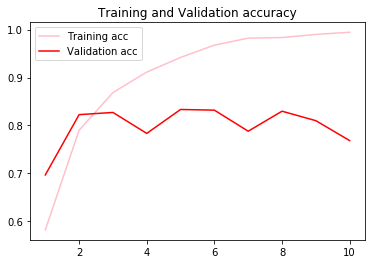

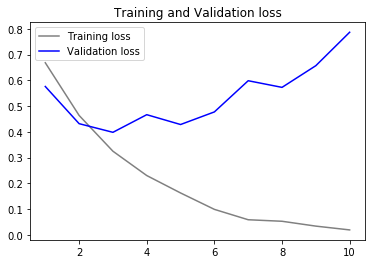

In [11]:
''''
評価
'''
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label="Training acc", color= "pink")
plt.plot(epochs, val_acc, label="Validation acc", color= "red")
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, label="Training loss", color= "gray")
plt.plot(epochs, val_loss, label="Validation loss", color= "blue")
plt.title("Training and Validation loss")
plt.legend()

plt.show()